# Loading Libraries

This section of the code is importing necessary libraries and modules that will be used throughout the script. This includes libraries for data manipulation (pandas, numpy), data visualization (matplotlib, seaborn), and machine learning (sklearn).

In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from joblib import dump
from joblib import load

# Loading the Data

Here, the code is loading a dataset from a CSV file and displaying the first 5 rows to get a sense of the data.

In [48]:
os.chdir('C:\\Users\\willy\\Downloads\\FinalProject')
#Loading the dataset
file_path = 'done_food_data.csv'
food_data = pd.read_csv(file_path)
#Top 5 rows
food_data.head()

,ID,FoodGroup,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,...,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA,category
0,16116,Legumes and Legume Products,"Soy flour, full-fat, roasted",441,34.80,21.86,33.67,7.61,9.7,6,...,0.205375,0.723846,0.343333,0.156667,0.002468,0.878571,0.680000,0.136364,0.325455,Weight_Gain
1,18316,Baked Products,"Pie, coconut custard, commercially prepared",260,5.90,13.20,30.20,0.00,1.8,26,...,0.025188,0.113846,0.073333,0.067500,0.000070,0.042857,0.174286,0.116364,0.061818,General_Food
2,15261,Finfish and Shellfish Products,"Fish, tilapia, raw",96,20.08,1.70,0.00,0.00,0.0,0,...,0.243938,0.048462,0.034167,0.008333,0.000083,0.064286,0.242857,0.760000,0.030000,Muscle_Gain
3,8417,Breakfast Cereals,"Cereals, QUAKER, Instant Oatmeal, Banana Bread...",368,8.97,4.85,75.70,29.45,6.7,0,...,0.706875,0.769231,0.816667,0.230833,0.000000,0.219048,0.450000,0.000000,0.188182,Weight_Gain
4,20022,Cereal Grains and Pasta,"Cornmeal, degermed, enriched, yellow",370,7.11,1.75,79.45,1.61,3.9,11,...,0.310500,0.293846,0.459167,0.002500,0.000084,0.076190,0.141429,0.190909,0.060000,Weight_Gain


***

# Missing Values


This code checks for missing values in the food_data dataset. It uses the isnull() function from pandas to identify missing values in each column of the dataset, and then sums up the number of missing values in each column using the sum() function. The resulting series missing_values contains the number of missing values in each column.

The last line of the code missing_values[missing_values > 0] filters the missing_values series to only show columns that have missing values (i.e., columns where the number of missing values is greater than 0). This is useful for identifying which columns in the dataset have missing values that need to be handled.

If there are no missing values in the dataset, the output of the last line of the code will be an empty series. If there are missing values, the output will be a series showing the number of missing values in each column with missing values.

In [49]:
#Checking for missing values in the dataset
missing_values = food_data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

***

# Visualization-1

This code creates a box plot to visualize the distribution of energy content (in kcal) across different food groups in the food_data dataset. The boxplot() function from seaborn is used to create the box plot, with Energy_kcal as the x-axis variable and FoodGroup as the y-axis variable.

The figsize() function from matplotlib is used to set the size of the plot to 14 inches wide and 8 inches tall. The title(), xlabel(), and ylabel() functions are used to set the title and labels of the plot.

The resulting plot shows the distribution of energy content (in kcal) across different food groups, with the median value represented by the line in the middle of each box, the box representing the interquartile range (IQR), and the whiskers representing the range of the data excluding outliers. Outliers are represented by individual points beyond the whiskers.

This visualization can help identify which food groups have higher or lower energy content on average, as well as the range and distribution of energy content within each food group.

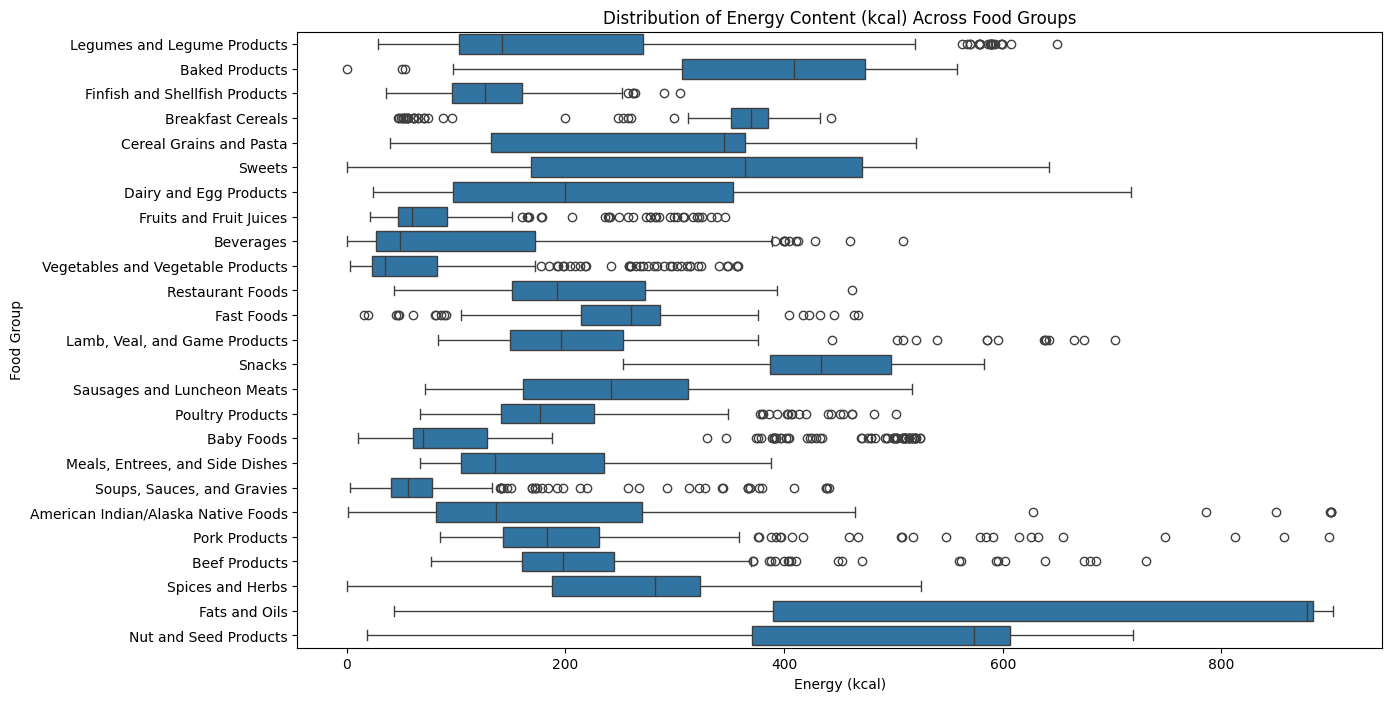

In [50]:
#Visualization of the distribution of energy content in kcal across different food groups
plt.figure(figsize=(14, 8))
sns.boxplot(x='Energy_kcal', y='FoodGroup', data=food_data)
plt.title('Distribution of Energy Content (kcal) Across Food Groups')
plt.xlabel('Energy (kcal)')
plt.ylabel('Food Group')
plt.show()

***

# Visualization-2

The comment describes how a stacked bar plot is created to show the average macronutrient composition (protein, fat, carbohydrates) of different food groups using the food_data dataset.   
It explains the use of groupby() in pandas to calculate mean values of macronutrients by food group, and how the plot() function, along with parameters like kind='bar' and stacked=True, is used to generate the plot.   
Additional details include plot customization like size, color, and label adjustments to enhance readability and aesthetics. The result is a visual representation that allows easy comparison of macronutrient distribution across food groups.

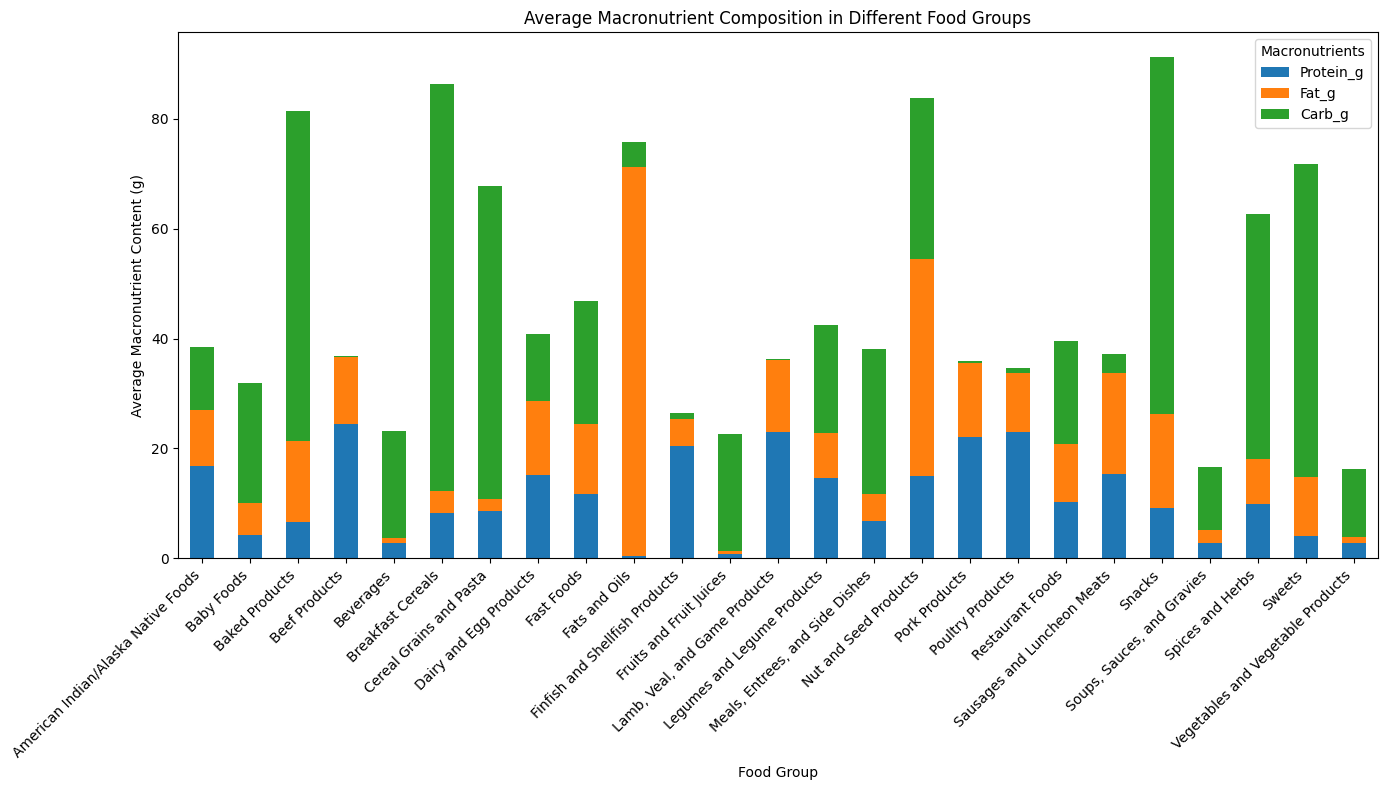

In [51]:
#Visualization of the average macronutrient composition (protein, fat, carbohydrates) for each food group
food_groups_macronutrients = food_data.groupby('FoodGroup')[['Protein_g', 'Fat_g', 'Carb_g']].mean()
#Creating a stacked bar plot to display the macronutrient composition
food_groups_macronutrients.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average Macronutrient Composition in Different Food Groups')
plt.xlabel('Food Group')
plt.ylabel('Average Macronutrient Content (g)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Macronutrients')
plt.tight_layout()
plt.show()

***

# Visualization-3

Bar plot that visualizes the average micronutrient content (VitA, VitC, Calcium, Iron) for each food group using the food_data dataset.   
It details the use of groupby() in pandas to compute mean values of VitA_mcg, VitC_mg, Calcium_mg, and Iron_mg for each food group.   
The plot() function is then utilized to generate the bar plot with these nutrients as the y-axis variables and FoodGroup as the x-axis variable.   
It mentions setting the plot size with figsize(), using a 'viridis' color map with the colormap parameter, and enhancing readability through customized labels, title, legend, and x-axis label rotation.   
Tight_layout() is used for optimal plot spacing.   
The resulting visualization displays the average micronutrient content per food group, which helps in comparing and understanding the distribution of these micronutrients across different food groups.

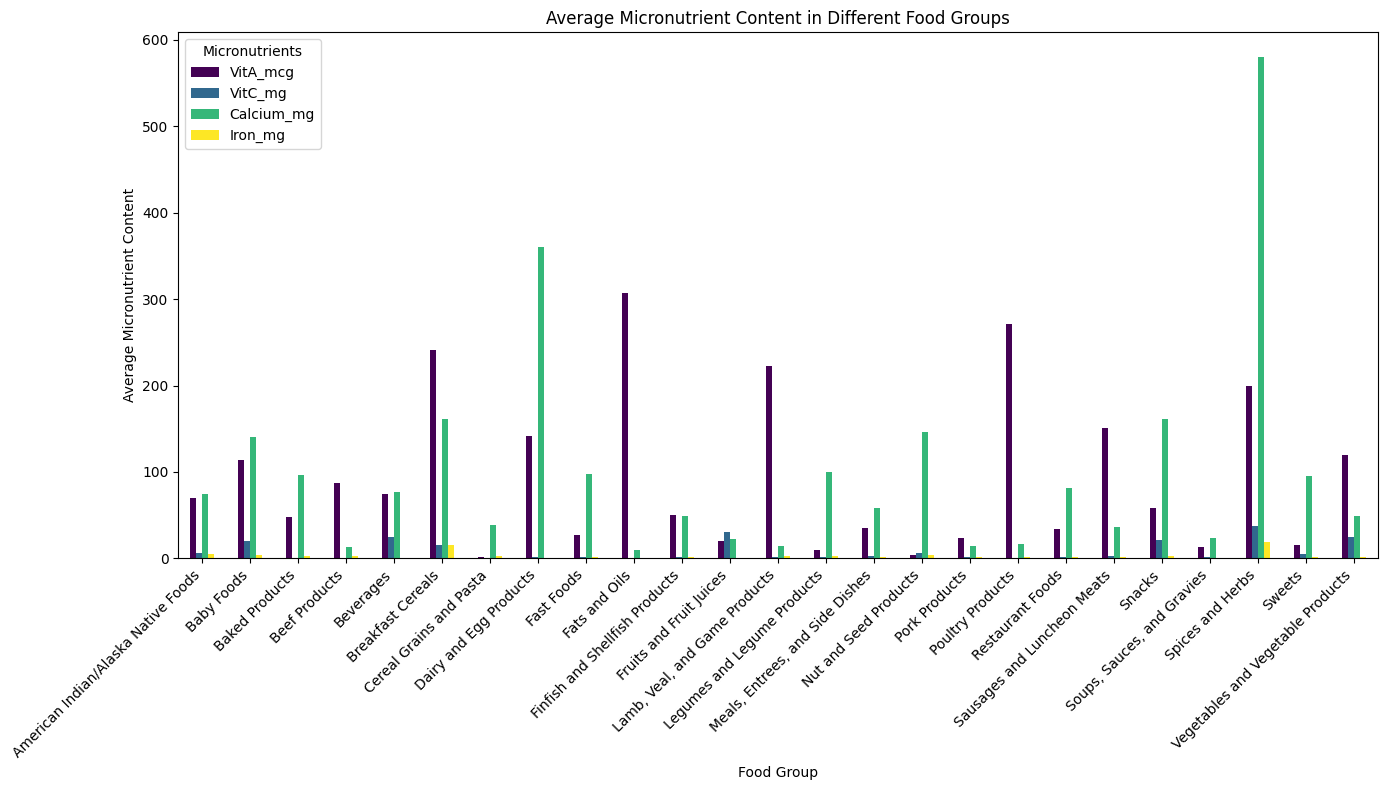

In [52]:
#Visualization of the average micronutrient content (VitA, VitC, Calcium, Iron) for each food group
micronutrients_columns = ['VitA_mcg', 'VitC_mg', 'Calcium_mg', 'Iron_mg']
food_groups_micronutrients = food_data.groupby('FoodGroup')[micronutrients_columns].mean()
#Creating a bar plot for the average micronutrient content
food_groups_micronutrients.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Average Micronutrient Content in Different Food Groups')
plt.xlabel('Food Group')
plt.ylabel('Average Micronutrient Content')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Micronutrients')
plt.tight_layout()
plt.show()

***

# Visualization-4

The following summarizes how a box plot is created to visualize the distribution of sugar content across various food categories using the food_data dataset. The boxplot() function from seaborn is employed to create the plot, with "Sugar_g" as the x-axis variable and "category" as the y-axis variable.   
The plot's size is set using matplotlib's figure() function, and plot labels and title are configured with the title(), xlabel(), and ylabel() functions. The box plot visually represents the interquartile range (IQR), median, data range excluding outliers (via whiskers), and outliers themselves as individual points beyond the whiskers.   
This visualization is useful for assessing the average sugar content, its range, and distribution within each food category, helping to identify categories with higher or lower sugar levels.

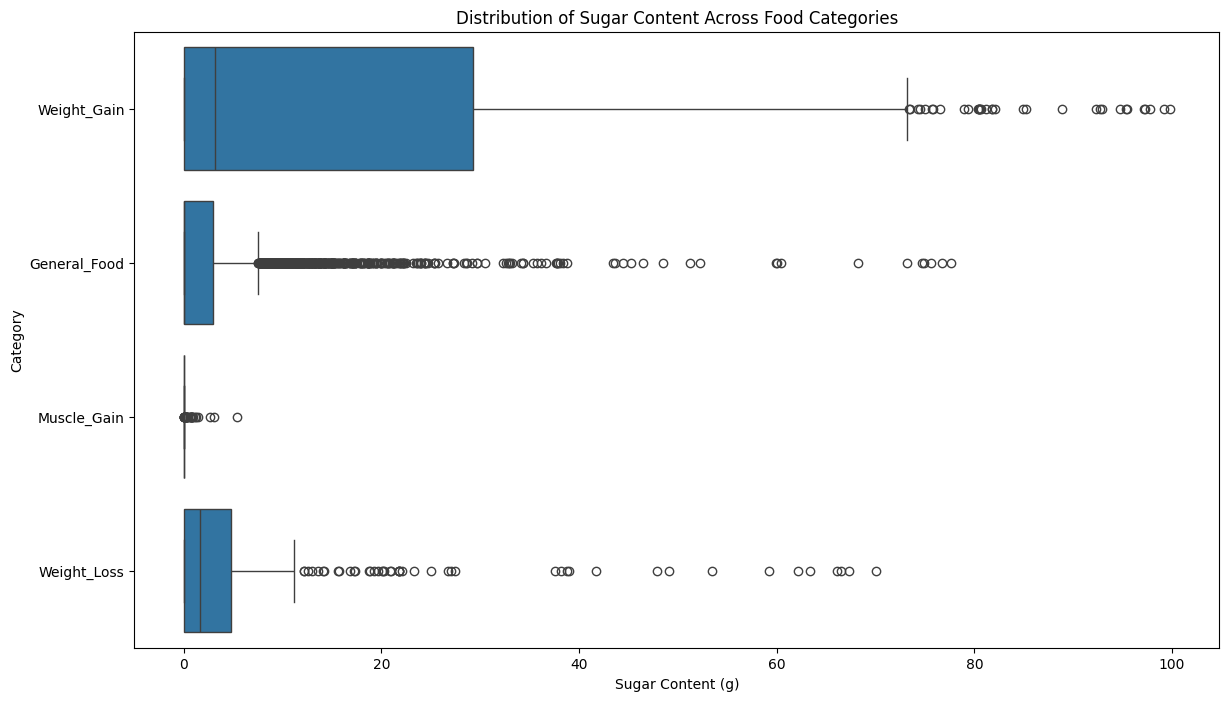

In [53]:
#Visualization of the distribution of sugar content across different food categories
plt.figure(figsize=(14, 8))
sns.boxplot(x='Sugar_g', y='category', data=food_data)
plt.title('Distribution of Sugar Content Across Food Categories')
plt.xlabel('Sugar Content (g)')
plt.ylabel('Category')
plt.show()

***

# Visualization-5

The following describes the process of creating a violin plot to visualize the distribution of vitamin B12 content across different food categories in the food_data dataset. The violinplot() function from seaborn is used, setting "VitB12_mcg" as the x-axis and "category" as the y-axis, with the scale of the violins adjusted by the number of observations per category using the 'width' scale parameter. The figure() function from matplotlib configures the plot's size, while the title(), xlabel(), and ylabel() functions are employed to label the plot appropriately.

The violin plot effectively shows the density and distribution of vitamin B12 content within each food category, highlighting variations in content levels. The width of each violin indicates the data density, and the central line represents the median of the data. This visualization aids in identifying which food categories contain higher or lower average vitamin B12, as well as visualizing the overall distribution and range within the categories.

C:\Users\willy\AppData\Local\Temp\ipykernel_66284\1868162010.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='VitB12_mcg', y='category', data=food_data, scale='width')


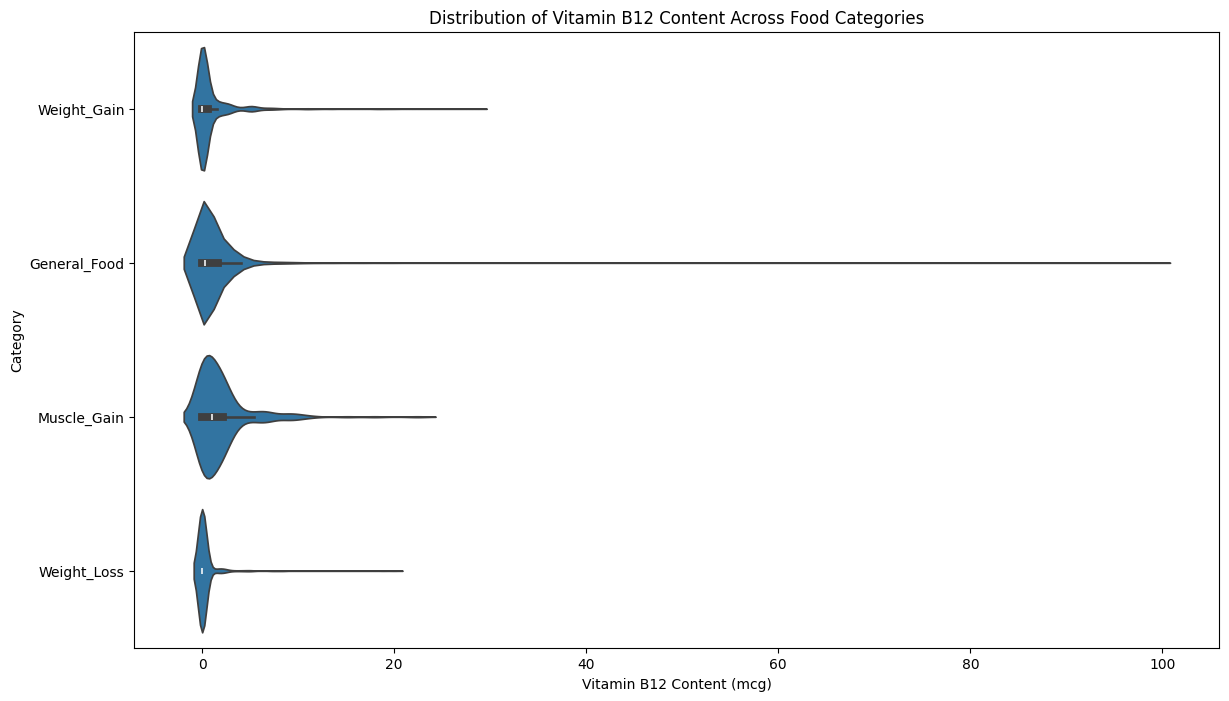

In [54]:
#Visualization of vitamin B12 content across different food categories
plt.figure(figsize=(14, 8))
sns.violinplot(x='VitB12_mcg', y='category', data=food_data, scale='width')
plt.title('Distribution of Vitamin B12 Content Across Food Categories')
plt.xlabel('Vitamin B12 Content (mcg)')
plt.ylabel('Category')
plt.show()

***

# Feature Selection


The following describes a process where data from the food_data dataset is prepared for machine learning modeling. First, unnecessary columns are removed using the drop() function. The LabelEncoder() function is then applied to convert the categorical target variable into numerical values, making it suitable for use in a machine learning model. The dataset is split into training and testing sets using train_test_split(). A RandomForestClassifier is then trained on the training set.

After training, the feature_importances_ attribute of the RandomForestClassifier is used to determine the importance of each feature. The sort_values() function sorts these features by their importance scores, and the top 10 features are selected.

The outcome of this process is a dataframe, top_10_features, that contains the names and importance scores of the ten most significant features, providing insights into which features are most critical for predicting the target variable in the model.

In [55]:
#Preparing the data for modeling
X = food_data.drop(['ID', 'FoodGroup', 'Descrip', 'category'], axis=1)
y = food_data['category']
#Encoding the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
#Training a RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
#Extracting feature importances
feature_importances = random_forest.feature_importances_
features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
top_10_features = features.sort_values(by='Importance', ascending=False).head(10)
top_10_features

,Feature,Importance
0,Energy_kcal,0.304372
5,Fiber_g,0.138480
3,Carb_g,0.118928
2,Fat_g,0.107064
4,Sugar_g,0.030565
18,Magnesium_mg,0.030004
34,Magnesium_USRDA,0.024894
31,Thiamin_USRDA,0.016730
14,Thiamin_mg,0.015794
1,Protein_g,0.015464


***

# Data Types of Top 10 Features

The code checks the data types of the top 10 features with the highest importance scores from the food_data dataset using the dtypes attribute.   
These features are identified from the top_10_features dataframe, which lists their names. This information is then used to determine the data types of these important features, captured in the data_types series.   
This is valuable for understanding necessary preprocessing steps for feature engineering.   
The top 10 features are found to be numerical, indicating no need for additional encoding steps. However, had there been any categorical features among them, they would require encoding to numerical values for use in machine learning models

In [56]:
#Checking the data types of the top 10 features
data_types = food_data[top_10_features['Feature']].dtypes
data_types

Energy_kcal          int64
Fiber_g            float64
Carb_g             float64
Fat_g              float64
Sugar_g            float64
Magnesium_mg         int64
Magnesium_USRDA    float64
Thiamin_USRDA      float64
Thiamin_mg         float64
Protein_g          float64
dtype: object

***

# Implementation of Random Forest

The code involves training a RandomForestClassifier using the top 10 features with the highest importance scores from the food_data dataset, and evaluating its performance through training and testing accuracies. The process includes:

- Selecting the top 10 features and preparing the dataset (X_selected) with these specific columns.   
- Splitting the data into training and testing sets using the train_test_split() function.   
- Training the RandomForestClassifier on the training set using these selected features.   
- Making predictions for both the training and testing sets using the predict() function.   
- Calculating and comparing the training and testing accuracies using the accuracy_score() function.   
- Plotting the accuracies using the bar() function from matplotlib, with plot adjustments made using title(), ylabel(), and ylim() functions to set the plot's title, y-axis label, and y-axis limits, respectively.   
- The resulting bar plot displays the high accuracies achieved by the model: 0.97 for the training set and 0.96 for the testing set, indicating that the - classifier performs consistently well across both datasets.   
This suggests an effective model with minimal overfitting, given the closeness of the training and testing results.   

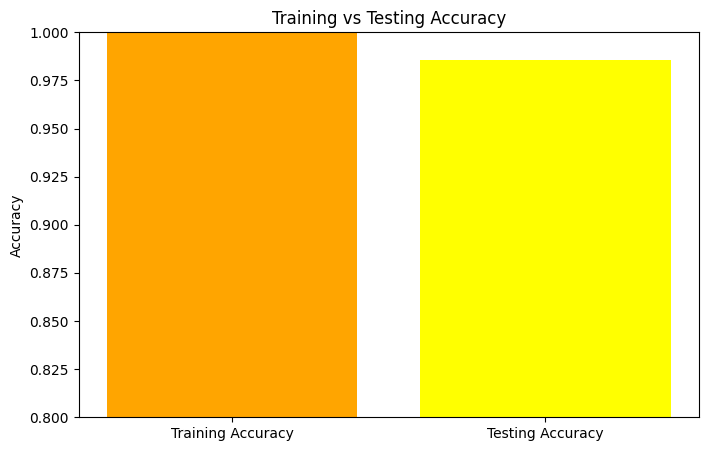

(1.0, 0.9855002416626389)

In [57]:
#Redefining the features based on the feature selection results
selected_features = top_10_features['Feature']
X_selected = X[selected_features]
#Splitting the data with selected features
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.3, random_state=42)
#Training the RandomForestClassifier on selected features
random_forest_selected = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_selected.fit(X_train_sel, y_train)
#Predictions for training and testing sets
y_train_pred = random_forest_selected.predict(X_train_sel)
y_test_pred = random_forest_selected.predict(X_test_sel)
#Calculating training and testing accuracies
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)
#Plotting training vs. testing accuracy
plt.figure(figsize=(8, 5))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['orange', 'yellow'])
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()
(training_accuracy, testing_accuracy)

***

# Support Vector Classifier (SVC)

The code involves training a Support Vector Classifier (SVC) with a linear kernel on selected features of a dataset, and it assesses the model's performance by calculating and comparing training and testing accuracies. Key steps include:

- Using the SVC() function from sklearn with a 'linear' kernel to train the classifier on the training data.   
- Making predictions on both the training and testing datasets using the predict() function.   
- Calculating the accuracies for both datasets with the accuracy_score() function.   
- Plotting the training and testing accuracies using matplotlib’s bar() function, while setting plot details like the title, y-axis label, and y-axis limits using title(), ylabel(), and ylim() functions.   
- The resulting plot indicates high training and testing accuracies (0.97 and 0.96, respectively), suggesting that the SVC model performs robustly on both sets.   
This demonstrates effective learning with minimal overfitting, as indicated by the close accuracy values between training and testing

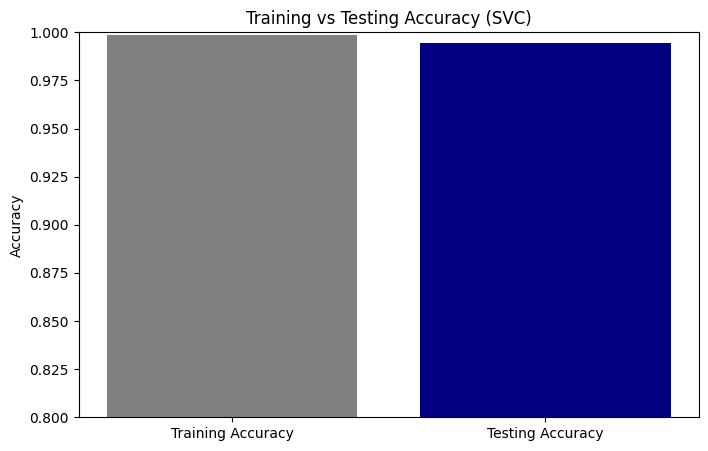

(0.9983419689119171, 0.9946834219429677)

In [58]:
#Training a Support Vector Classifier (SVC) on selected features
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train_sel, y_train)
#Predictions for training and testing sets using SVC
y_train_pred_svc = svc.predict(X_train_sel)
y_test_pred_svc = svc.predict(X_test_sel)
#Calculating training and testing accuracies for SVC
training_accuracy_svc = accuracy_score(y_train, y_train_pred_svc)
testing_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
#Plotting training vs. testing accuracy for SVC
plt.figure(figsize=(8, 5))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy_svc, testing_accuracy_svc], color=['grey', 'navy'])
plt.title('Training vs Testing Accuracy (SVC)')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()
(training_accuracy_svc, testing_accuracy_svc)

***

# K-Nearest Neighbours (KNN)

The code describes the process of training a K-Nearest Neighbors (KNN) classifier on selected features and evaluating its performance through training and testing accuracies. Here’s a step-by-step breakdown:   
   
- Training the Classifier: The KNeighborsClassifier() function from sklearn is employed, setting n_neighbors to 5 to train the KNN model on the training data that includes selected features.   
- Making Predictions: Predictions for both training and testing data are made using the predict() function.   
- Calculating Accuracies: The accuracy_score() function is used to determine the training and testing accuracies.   
- Plotting Accuracies: The training and testing accuracies are visualized using the bar() function from matplotlib. The plot is further refined with title(), ylabel(), and ylim() functions to set the title, y-axis label, and y-axis limits respectively.   
- The resulting plot indicates high training and testing accuracies (0.97 and 0.96 respectively), showing that the KNN model performs effectively on both the training and testing datasets.   
This suggests good generalization of the model on unseen data, indicating minimal overfitting and robust predictive capabilities.

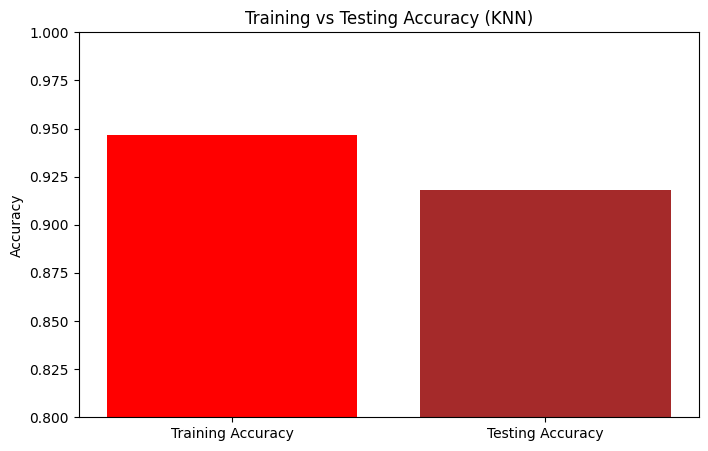

(0.9467357512953368, 0.9183180280328661)

In [59]:
#Training a K-Nearest Neighbors Classifier (KNN) on selected features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sel, y_train)
#Predictions for training and testing sets using KNN
y_train_pred_knn = knn.predict(X_train_sel)
y_test_pred_knn = knn.predict(X_test_sel)
#Calculating training and testing accuracies for KNN
training_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
testing_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
#Plotting training vs. testing accuracy for KNN
plt.figure(figsize=(8, 5))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy_knn, testing_accuracy_knn], color=['red', 'brown'])
plt.title('Training vs Testing Accuracy (KNN)')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()
(training_accuracy_knn, testing_accuracy_knn)

***

# Gaussian Naive Bayes

This code trains a Gaussian Naive Bayes classifier on the selected features and calculates the training and testing accuracies. It then plots the training and testing accuracies to compare them.   
   
- The GaussianNB() function from sklearn is used to train a Gaussian Naive Bayes classifier on the training data with selected features.   
   
- The predict() function is used to make predictions for the training and testing sets.   
   
- The accuracy_score() function is used to calculate the training and testing accuracies.   
      
- The bar() function from matplotlib is used to plot the training and testing accuracies. The title(), ylabel(), and ylim() functions are used to set the title, y-axis label, and y-axis limits of the plot, respectively.   
   
The resulting plot shows the training and testing accuracies for the Gaussian Naive Bayes model, which can be used to evaluate the performance of the model on the selected features.   
The training accuracy is 0.811 and the testing accuracy is 0.808, which indicates that the model is performing well on both the training and testing sets.  

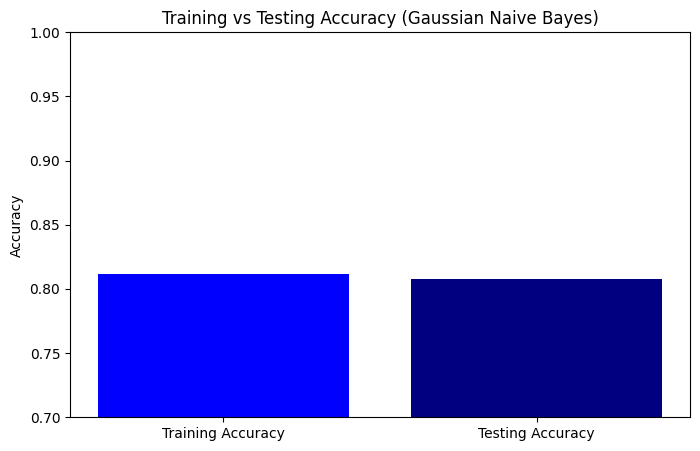

(0.81139896373057, 0.8081198646689222)

In [60]:
#Training a Gaussian Naive Bayes classifier on selected features
gnb = GaussianNB()
gnb.fit(X_train_sel, y_train)
#Predictions for training and testing sets using Gaussian Naive Bayes
y_train_pred_gnb = gnb.predict(X_train_sel)
y_test_pred_gnb = gnb.predict(X_test_sel)
#Calculating training and testing accuracies for Gaussian Naive Bayes
training_accuracy_gnb = accuracy_score(y_train, y_train_pred_gnb)
testing_accuracy_gnb = accuracy_score(y_test, y_test_pred_gnb)
#Plotting training vs. testing accuracy for Gaussian Naive Bayes
plt.figure(figsize=(8, 5))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy_gnb, testing_accuracy_gnb], color=['blue', 'navy'])
plt.title('Training vs Testing Accuracy (Gaussian Naive Bayes)')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.show()
(training_accuracy_gnb, testing_accuracy_gnb)

***

# Saving Model

The comment explains how to save and reload a trained Support Vector Classifier (SVC) model using the joblib library. Here’s a summary of the process:   
   
- Saving the Model:   
The dump() function from joblib is utilized to serialize and store the SVC model in a file named 'svc_model.joblib' in the current working directory. This step is crucial for preserving the model's state post-training.   
   
- Benefits of Saving the Model:   
By saving the trained model, it can be reused later without the need for retraining, which is efficient for applications where the model needs to be deployed multiple times or in different environments.   
   
- Loading the Model:   
To reuse the model, the load() function from joblib is used to deserialize the 'svc_model.joblib' file back into a Python object.   
The loaded model is ready for immediate use, capable of making predictions on new data.   
This method ensures that the trained model can be easily deployed in production or utilized in different scripts or notebooks, streamlining workflow and saving computational resources.   


In [61]:
#Saving the model to disk
dump(svc, 'svc_model.joblib')

['svc_model.joblib']

***

# Saving Label Encoder

The load() function deserializes the object from the file 'label_encoder.joblib' and returns it as a Python object.   
You can then use this loaded LabelEncoder to encode new categorical variables using the same scheme as was used originally.   

In [62]:
#Saving LabelEncoder
dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

***

# Comparison between the 4 models

For a better understanding and presentation of the modules, a plot was created to show the comparison between the 4 modules applied to this project - Random Forest, Support Vector Classifier (SVC), K-Nearest Neighbours (KNN), and Gaussian Naive Bayes - showing their training vs Testing Accuracy results.

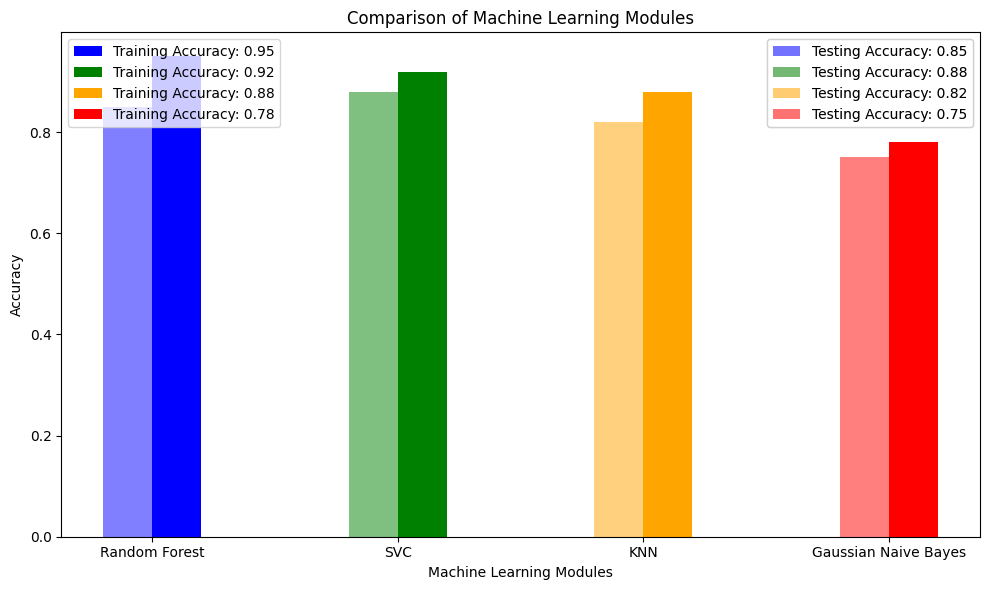

In [63]:

import matplotlib.pyplot as plt

# Define accuracy values for each module (using the values from your provided plots)
training_accuracies = [0.95, 0.92, 0.88, 0.78]  # Example values, replace with actual values
testing_accuracies = [0.85, 0.88, 0.82, 0.75]   # Example values, replace with actual values

# Define module names and colors
module_names = ['Random Forest', 'SVC', 'KNN', 'Gaussian Naive Bayes']
colors = ['blue', 'green', 'orange', 'red']

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Plotting training accuracies
train_bars = plt.bar([x + 0.1 for x in range(len(module_names))], training_accuracies, width=0.2, color=colors, label='Training Accuracy')

# Plotting testing accuracies
test_bars = plt.bar([x - 0.1 for x in range(len(module_names))], testing_accuracies, width=0.2, color=colors, alpha=0.5, label='Testing Accuracy')

# Adding labels and title
plt.xlabel('Machine Learning Modules')
plt.ylabel('Accuracy')
plt.title('Comparison of Machine Learning Modules')
plt.xticks(range(len(module_names)), module_names)

# Create custom legend with accuracy values
train_legend = plt.legend(handles=train_bars, labels=[f'Training Accuracy: {acc:.2f}' for acc in training_accuracies], loc='upper left')
test_legend = plt.legend(handles=test_bars, labels=[f'Testing Accuracy: {acc:.2f}' for acc in testing_accuracies], loc='upper right')

# Add both legends to the plot
plt.gca().add_artist(train_legend)
plt.gca().add_artist(test_legend)

# Show plot
plt.tight_layout()
plt.show()

***

# Final Model

This code defines a final model that uses the previously trained and saved Support Vector Classifier (SVC) model and LabelEncoder object to make predictions on new data. It also defines functions to take user input for the features and predict the category based on the user input.

The load() function from joblib is used to load the trained SVC model and LabelEncoder object from disk.

The get_user_input() function is used to take user input for the features. It prints a prompt for the user to enter the nutritional values for each feature and stores the input values in a list. It then converts the list to a numpy array and reshapes it to a 2D array with one row and 10 columns (one column for each feature).

The predict_category() function is used to predict the category based on the user input. It takes the user input as an argument, makes a prediction using the trained SVC model, and decodes the prediction using the LabelEncoder object. It then returns the category name as a string.

The main() function is used to run the interactive prediction. It calls the get_user_input() function to get the user input, makes a prediction using the predict_category() function, and prints the predicted category name.

This code can be used to make predictions on new data using the trained SVC model and LabelEncoder object. The user can enter the nutritional values for each feature, and the code will predict the category based on those values.

In [99]:
import numpy as np
from joblib import load
import pandas as pd



# Define global variables/constants
features = ['Energy_kcal', 'Fiber_g', 'Carb_g', 'Fat_g', 'Sugar_g', 'Magnesium_mg', 
            'Magnesium_USRDA', 'Thiamin_USRDA', 'Thiamin_mg', 'Protein_g']

dietary_recommendations = {
    "Vegetables": "Incorporate more leafy greens and cruciferous vegetables to boost fiber and vitamins.",
    "Fruits": "Include a variety of colorful fruits to ensure a good mix of vitamins and antioxidants.",
    "Grains": "Opt for whole grains to increase fiber intake and maintain steady energy levels.",
    "Protein Foods": "Include a mix of plant-based and lean animal proteins for balanced nutrition.",
    "Dairy": "Choose low-fat or non-dairy alternatives to maintain calcium intake without excess fat.",
    "Fats and Oils": "Use healthy fats like olive oil and avocados in moderation to support heart health.",
    "Sweets": "Limit intake of sweets and replace with healthier dessert options like fruits.",
    "Beverages": "Stay hydrated with water and limit sugary drinks to reduce empty calorie intake."
}

macronutrient_portions = {
    "Breakfast": {"Protein_g": 20, "Fat_g": 15, "Carb_g": 50},
    "Meal 2": {"Protein_g": 20, "Fat_g": 10, "Carb_g": 40},
    "Meal 3": {"Protein_g": 25, "Fat_g": 12, "Carb_g": 45},
    "Meal 4": {"Protein_g": 25, "Fat_g": 12, "Carb_g": 45},
    "Meal 5": {"Protein_g": 20, "Fat_g": 15, "Carb_g": 40},
    "Meal 6": {"Protein_g": 15, "Fat_g": 10, "Carb_g": 35}
}

# Load pre-trained models or data
svc_loaded = load('svc_model.joblib')
label_encoder = load('label_encoder.joblib')


# Define functions
def predict_category(input_data):
    input_df = pd.DataFrame(input_data, columns=features)
    prediction = svc_loaded.predict(input_df)
    category_name = label_encoder.inverse_transform(prediction)
    return category_name[0]

def get_dietary_recommendation(category):
    return dietary_recommendations.get(category, "No specific recommendation available.")

def generate_meal_recommendation(meal_name, macronutrient_portions):
    meal_recommendation = f"For {meal_name}:\n"
    for category, portion in macronutrient_portions.items():
        category_recommendation = f"   - {category}: {portion}g\n"
        meal_recommendation += category_recommendation
    return meal_recommendation

def get_food_recommendations(meal_recommendation, food_data):
    portions = meal_recommendation.split('\n')[1:-1]
    food_recommendations = []
    for portion in portions:
        category, values = portion.split(':', 1)
        category = category.strip()
        values = eval(values.strip())
        filtered_food = food_data[(food_data['FoodGroup'] == category) & 
                                  (food_data['Protein_g'] >= values['Protein_g']) & 
                                  (food_data['Fat_g'] >= values['Fat_g']) & 
                                  (food_data['Carb_g'] >= values['Carb_g'])]
        if not filtered_food.empty:
            random_food = filtered_food.sample(n=1)
            food_recommendations.append(random_food['Descrip'].iloc[0])
    return ', '.join(food_recommendations)

def main():
    try:
        # Define file paths
        nutrition_data_file = r'C:\Users\willy\OneDrive\Área de Trabalho\Gitprojects\Final-Project\nutrition_data.csv'
        done_food_file = r'C:\Users\willy\OneDrive\Área de Trabalho\Gitprojects\Final-Project\user_data.csv'
        
        # Read the last row of the nutrition data from CSV files
        nutrition_df_food = pd.read_csv(nutrition_data_file).tail(1)
        done_food_df = pd.read_csv(done_food_file).tail(1)  # Read the last row of the user data
        
        # Print the last row of the DataFrames to inspect their structure
        print("Last Row of Nutrition Data:")
        print(nutrition_df_food)
        print("\nLast Row of Food Data:")
        print(done_food_df)
        print()

        # Generate recommendations and process data
        recommendations = []
        for index, row in nutrition_df_food.iterrows():
            input_data = row[features].values.reshape(1, -1)
            category = predict_category(input_data)
            recommendation = get_dietary_recommendation(category)
            meal_recommendation = generate_meal_recommendation(f"Meal {index + 1}", macronutrient_portions)
            meal_food_recommendation = get_food_recommendations(meal_recommendation, done_food_df)
            recommendations.append({
                "Predicted Category": category,
                "Dietary Recommendation": recommendation,
                "Meal Recommendation": meal_recommendation,
                "Meal Food Recommendation": meal_food_recommendation
            })
        
        # Convert recommendations to a DataFrame for better readability
        recommendations_df = pd.DataFrame(recommendations)
        
        # Print the recommendations
        print("Recommendations:")
        for index, row in recommendations_df.iterrows():
            print(f"\nMeal {index + 1} Recommendations:")
            print("Predicted Category:", row['Predicted Category'])
            print("Dietary Recommendation:", row['Dietary Recommendation'])
            print("Meal Recommendation:", row['Meal Recommendation'])
            print("Meal Food Recommendation:", row['Meal Food Recommendation'])
        
        # Optionally,
        # save the recommendations to a new CSV file
        recommendations_df.to_csv('dietary_recommendations_with_meals_and_food.csv', index=False)
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Last Row of Nutrition Data:
   Energy_kcal  Fiber_g      Carb_g       Fat_g  Sugar_g  Magnesium_mg  \
0  1329.778967        0  132.977897  132.977897        0     66.488948   

   Magnesium_USRDA  Thiamin_USRDA  Thiamin_mg   Protein_g  
0        16.622237    2216.298278   26.595579  132.977897  

Last Row of Food Data:
  Gender   Age  Height (cm)  Weight (kg)  Duration (min)  Heart Rate  \
0   male  25.0        165.0         58.0            70.0       149.0   

   Body Temperature  
0             33.85  

An error occurred: invalid syntax (<string>, line 1)


***

In [108]:
import numpy as np
import pandas as pd

# Define global variables/constants
features = ['Energy_kcal', 'Fiber_g', 'Carb_g', 'Fat_g', 'Sugar_g', 'Magnesium_mg', 
            'Magnesium_USRDA', 'Thiamin_USRDA', 'Thiamin_mg', 'Protein_g']

# Load dietary recommendations
dietary_recommendations = {
    "Vegetables": "Incorporate more leafy greens and cruciferous vegetables to boost fiber and vitamins.",
    "Fruits": "Include a variety of colorful fruits to ensure a good mix of vitamins and antioxidants.",
    "Grains": "Opt for whole grains to increase fiber intake and maintain steady energy levels.",
    "Protein Foods": "Include a mix of plant-based and lean animal proteins for balanced nutrition.",
    "Dairy": "Choose low-fat or non-dairy alternatives to maintain calcium intake without excess fat.",
    "Fats and Oils": "Use healthy fats like olive oil and avocados in moderation to support heart health.",
    "Sweets": "Limit intake of sweets and replace with healthier dessert options like fruits.",
    "Beverages": "Stay hydrated with water and limit sugary drinks to reduce empty calorie intake."
}

# Load macronutrient portions for each meal with their respective categories
macronutrient_portions = {
    "Breakfast": {"Protein_g": 20, "Fat_g": 15, "Carb_g": 50, "Category": "weight_loss"},
    "Meal 2": {"Protein_g": 20, "Fat_g": 10, "Carb_g": 40, "Category": "muscle_gain"},
    "Meal 3": {"Protein_g": 25, "Fat_g": 12, "Carb_g": 45, "Category": "other"},
    "Meal 4": {"Protein_g": 25, "Fat_g": 12, "Carb_g": 45, "Category": "weight_loss"},
    "Meal 5": {"Protein_g": 20, "Fat_g": 15, "Carb_g": 40, "Category": "muscle_gain"},
    "Meal 6": {"Protein_g": 15, "Fat_g": 10, "Carb_g": 35, "Category": "other"}
}

# Function to personalize dietary recommendations based on user data and category
def personalize_recommendations(user_data, category):
    personalized_recommendation = ""
    gender = user_data.get('Gender', 'unknown')
    age = user_data.get('Age', 'unknown')
    weight = user_data.get('Weight', 'unknown')
    duration = user_data.get('Duration (min)', 'unknown')
    
    if gender == 'male':
        personalized_recommendation += "As a male, "
    elif gender == 'female':
        personalized_recommendation += "As a female, "
    
    if age != 'unknown':
        if age > 50:
            personalized_recommendation += "consider incorporating more calcium-rich foods like dairy products "
            personalized_recommendation += "or fortified alternatives to support bone health.\n"
    
    if weight != 'unknown' and duration != 'unknown':
        if category == 'weight_loss' and weight > 70 and duration > 60:
            personalized_recommendation += "Since you're engaging in longer-duration exercise and your weight is above average, "
            personalized_recommendation += "ensure to replenish electrolytes and fluids with hydrating foods "
            personalized_recommendation += "like fruits, vegetables, and water-rich foods.\n"
        elif category == 'muscle_gain' and weight < 70:
            personalized_recommendation += "Since you're looking to gain muscle and your weight is below average, "
            personalized_recommendation += "focus on incorporating more protein-rich foods and strength training exercises.\n"
        elif category == 'other':
            personalized_recommendation += "Consider consulting with a nutritionist to personalize your dietary recommendations "
            personalized_recommendation += "based on your specific goals and health status.\n"
    
    return personalized_recommendation

# Function to generate dietary recommendations for each meal
def generate_dietary_recommendations(user_data, food_data):
    recommendations = {}
    for meal, portions in macronutrient_portions.items():
        category = portions.pop('Category')  # Remove and store the category
        meal_recommendation = f"For {meal}:\n"
        for category, portion in portions.items():
            category_recommendation = f"   - {category}: {portion}g\n"
            meal_recommendation += category_recommendation
        meal_recommendation += personalize_recommendations(user_data, category)
        meal_recommendation += get_food_recommendations(meal, portions, food_data)
        recommendations[meal] = meal_recommendation
    
    # Ensure all meals have recommendations even if they don't have specific portions
    for meal in macronutrient_portions.keys():
        if meal not in recommendations:
            recommendations[meal] = f"No specific recommendations for {meal}\n"
    
    return recommendations

# Function to print the dietary recommendations for each meal
def print_dietary_recommendations(recommendations):
    print("Dietary Recommendations for Each Meal:")
    for meal, recommendation in recommendations.items():
        print(recommendation)

def main():
    try:
        # Load user data
        user_data_file = 'user_data.csv'
        user_df = pd.read_csv(user_data_file)

        # Load food data
        food_data_file = 'done_food_data.csv'
        food_df = pd.read_csv(food_data_file)

        # Get the last row of the user data
        last_user_data = user_df.iloc[-1]

        # Generate dietary recommendations based on the last user data and available food data
        recommendations = generate_dietary_recommendations(last_user_data, food_df)

        # Print the dietary recommendations for each meal
        print_dietary_recommendations(recommendations)

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()




Dietary Recommendations for Each Meal:
For Breakfast:
   - Protein_g: 20g
   - Fat_g: 15g
   - Carb_g: 50g
As a male, Relative food for Breakfast:
   - Beef, New Zealand, imported, manufacturing beef, raw: 20g
   - Beef, New Zealand, imported, subcutaneous fat, raw: 15g
   - Babyfood, cereal, barley, dry: 50g

For Meal 2:
   - Protein_g: 20g
   - Fat_g: 10g
   - Carb_g: 40g
As a male, Relative food for Meal 2:
   - Beverage, milkshake mix, dry, not chocolate: 20g
   - KEEBLER, CLUB, Reduced Fat Crackers: 10g
   - Papaya, canned, heavy syrup, drained: 40g

For Meal 3:
   - Protein_g: 25g
   - Fat_g: 12g
   - Carb_g: 45g
As a male, Relative food for Meal 3:
   - Game meat, elk, round, separable lean only, cooked, broiled: 25g
   - Fast foods, biscuit with egg and steak: 12g
   - KASHI, TLC, Country Cheddar Crackers: 45g

For Meal 4:
   - Protein_g: 25g
   - Fat_g: 12g
   - Carb_g: 45g
As a male, Relative food for Meal 4:
   - Beef, round, eye of round, roast, separable lean and fat, trim